In [1]:
import numpy as np

In [2]:
ndata = 11
x = np.linspace(0, 1, ndata)

In [3]:
k = 1.3
b = 0.5
y = k*x + b

In [4]:
np.random.seed(40)
data = y*(1 + np.random.normal(loc=0, scale=0.10, size=ndata))

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
true_x = np.linspace(0, 1, 100)
true_y = k*true_x + b

In [7]:
from scipy import stats

In [8]:
p, V = np.polyfit(x, data, 1, cov=True)

In [9]:
print(p, V)

[1.4705246  0.45184833] [[ 0.01370245 -0.00685122]
 [-0.00685122  0.00479586]]


In [11]:
print("slope: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("intercept: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

slope: 1.4705245980113546 +/- 0.11705745170034831
intercept: 0.4518483259376043 +/- 0.06925212234655904


In [12]:
fitted_y = p[0]*true_x + p[1]

In [13]:
fitted_y_err = []
for xi in true_x:
    variance_y = np.matmul(np.array([xi, 1]), np.matmul(V, np.array([xi, 1]).transpose()))
    fitted_y_err.append(np.sqrt(variance_y))
fitted_y_err = np.array(fitted_y_err)

In [14]:
fitted_y_up = fitted_y + fitted_y_err
fitted_y_down = fitted_y - fitted_y_err

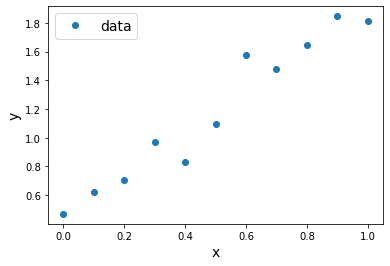

In [20]:
plt.plot(x, data, 'o', label='data')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=14)
plt.savefig("linear_data.png")

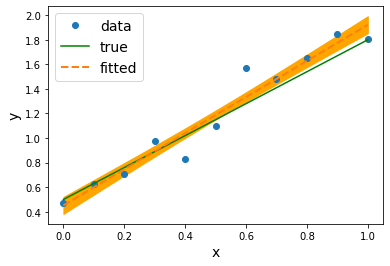

In [28]:
plt.plot(x, data, 'o', label='data')
plt.plot(true_x, true_y, '-', color='g', label='true')
plt.plot(true_x, fitted_y, '--', label='fitted', lw=2)
plt.fill_between(true_x, fitted_y_down, fitted_y_up, color='orange')
plt.legend(fontsize=14)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.savefig("line_fit_with_error.png")

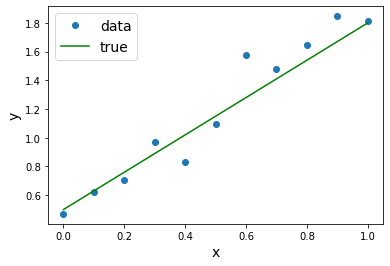

In [31]:
plt.plot(x, data, 'o', label='data')
plt.plot(true_x, true_y, '-', color='g', label='true')
# plt.plot(true_x, fitted_y, '--', label='fitted', lw=2)
# plt.fill_between(true_x, fitted_y_down, fitted_y_up, color='orange')
plt.legend(fontsize=14)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.savefig("line_fit_no_error.png")

In [29]:
print(" & ".join([str(i) for i in x]))
print(" & ".join(["{:.2f}".format(i) for i in data]))

0.0 & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 & 1.0
0.47 & 0.62 & 0.71 & 0.97 & 0.83 & 1.10 & 1.57 & 1.48 & 1.65 & 1.85 & 1.81


In [87]:
import matplotlib
print(matplotlib.__version__)

2.0.2


# P-values

In [42]:
from scipy.stats import norm

In [104]:
nbkg = 5000
nsb = 5000
background = np.random.normal(10, 4.4, nbkg)
sb = np.random.normal(16, 3, nsb)

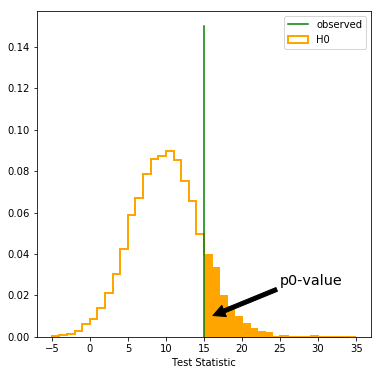

In [112]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
x_range = (-5, 35)
nbins = 40
ndata = 15
# hist_sb, bins, _ = ax.hist(sb, histtype='step', bins=nbins, 
#                            range=x_range, lw=2, label='H1',
#                            color='blue', normed=1
#                           )
hist_b, bins, _ = ax.hist(background, histtype='step', 
                          bins=nbins, range=x_range, lw=2, label='H0',
                          color='orange', normed=1
                         )
ax.plot([ndata, ndata], [0, 0.15], label="observed", color='green')

idatabin = 0
for ibin,bin_val in enumerate(bins):
    if bin_val >= ndata:
        break
    else:
        idatabin = ibin
        
ax.fill_between(bins[ibin:][:-1], 0, hist_b[ibin:], color='orange', step='post')
ax.annotate("p0-value", xy=(16, 0.01), xytext=(25, 0.025), 
            arrowprops=dict(facecolor='black', shrink=0.02), fontsize='x-large')
ax.set_xlabel("Test Statistic")
ax.legend()
plt.savefig("p0_demo.eps")

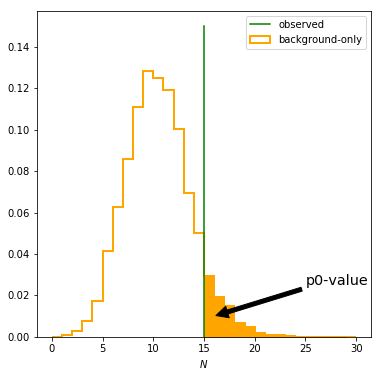

In [33]:
np.random.seed(40)
bkg_poisson = np.random.poisson(10, 5000)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
x_range = (0, 30)
nbins = 30

ndata = 15

hist_b, bins, _ = ax.hist(bkg_poisson, histtype='step', 
                          bins=nbins, range=x_range, lw=2, label='background-only',
                          color='orange', normed=1
                         )
ax.plot([ndata, ndata], [0, 0.15], label="observed", color='green')

idatabin = 0
for ibin,bin_val in enumerate(bins):
    if bin_val >= ndata:
        break
    else:
        idatabin = ibin

idatabin += 1
ax.fill_between(bins[idatabin:][:-1], 0, hist_b[idatabin:], color='orange', step='post')
ax.annotate("p0-value", xy=(16, 0.01), xytext=(25, 0.025), 
            arrowprops=dict(facecolor='black', shrink=0.02), fontsize='x-large')
ax.set_xlabel("$N$")
ax.legend()
plt.savefig("p0_demo.eps")

In [34]:
print(sum(hist_b[idatabin:]))

0.0788


In [36]:
import ROOT

Welcome to JupyROOT 6.12/04


In [39]:
ROOT.Math.normal_quantile(1- 0.0788, 1)

1.413189544250503

In [38]:
ROOT.Math.normal_cdf(5)

0.9999997133484282

In [40]:
ROOT.RooStats.PValueToSignificance(0.0788)

1.413189544250503


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

